#Importation DataSet

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/ArnoMac/weatherAUS/main/weatherAUS_Kapy_v2.csv"
weather = pd.read_csv(url, index_col=0)
weather.head()

,Date,Location,Rainfall,WindGustSpeed,Temp9am,RainTomorrow,DayOfYear,Month,Latitude,Longitude,...,consecutiveRainingDays,Climate_Am,Climate_Aw,Climate_BSh,Climate_BSk,Climate_BWh,Climate_Cfa,Climate_Cfb,Climate_Csa,Climate_Csb
0,2008-12-01,Albury,0.6,44.0,16.9,0.0,336,12,-36.0806,146.9158,...,0,0,0,0,0,0,1,0,0,0
1,2008-12-02,Albury,0.0,44.0,17.2,0.0,337,12,-36.0806,146.9158,...,0,0,0,0,0,0,1,0,0,0
2,2008-12-03,Albury,0.0,46.0,21.0,0.0,338,12,-36.0806,146.9158,...,0,0,0,0,0,0,1,0,0,0
3,2008-12-04,Albury,0.0,24.0,18.1,0.0,339,12,-36.0806,146.9158,...,0,0,0,0,0,0,1,0,0,0
4,2008-12-05,Albury,1.0,41.0,17.8,0.0,340,12,-36.0806,146.9158,...,0,0,0,0,0,0,1,0,0,0


In [3]:
#Enlever NaN
weather.dropna(inplace=True)
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119115 entries, 3 to 145458
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    119115 non-null  object 
 1   Location                119115 non-null  object 
 2   Rainfall                119115 non-null  float64
 3   WindGustSpeed           119115 non-null  float64
 4   Temp9am                 119115 non-null  float64
 5   RainTomorrow            119115 non-null  float64
 6   DayOfYear               119115 non-null  int64  
 7   Month                   119115 non-null  int64  
 8   Latitude                119115 non-null  float64
 9   Longitude               119115 non-null  float64
 10  diffWind3pm9am          119115 non-null  float64
 11  diffTempMinMax          119115 non-null  float64
 12  diffPressure9am3pm      119115 non-null  float64
 13  Pressure                119115 non-null  float64
 14  DeltaP_1d           

In [4]:
#Enlever les colonnes date & Location

weather = weather.drop('Date', axis=1)
weather = weather.drop('Location', axis=1)

In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119115 entries, 3 to 145458
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Rainfall                119115 non-null  float64
 1   WindGustSpeed           119115 non-null  float64
 2   Temp9am                 119115 non-null  float64
 3   RainTomorrow            119115 non-null  float64
 4   DayOfYear               119115 non-null  int64  
 5   Month                   119115 non-null  int64  
 6   Latitude                119115 non-null  float64
 7   Longitude               119115 non-null  float64
 8   diffWind3pm9am          119115 non-null  float64
 9   diffTempMinMax          119115 non-null  float64
 10  diffPressure9am3pm      119115 non-null  float64
 11  Pressure                119115 non-null  float64
 12  DeltaP_1d               119115 non-null  float64
 13  DeltaP_2d               119115 non-null  float64
 14  DeltaP_3d           

# Logistic Regression on the original dataset

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

#Séparation du jeu de donnée target et data

target = weather['RainTomorrow']
data = weather.drop('RainTomorrow', axis=1)

#Rescale avec MinMax

scaler = MinMaxScaler()
data = scaler.fit_transform(data)

#Séparation du jeu de données en train et test

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Création objet et entrainer sur le jeu
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Prediction
y_pred_lr = lr.predict(X_test)

# Accurary
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

# F1_score
f1 = f1_score(y_test, y_pred_lr)
print("F1-score:", f1)

# Matrice de confusion
cm = pd.crosstab (y_test, y_pred_lr, rownames = ['Class Reele'], colnames = ['Classe Prédite'])
print(cm)

Accuracy: 0.8555177769382529
F1-score: 0.6161052866384119
Classe Prédite    0.0   1.0
Class Reele                
0.0             17619   971
1.0              2471  2762


#Rééchantillonage

## Undersampling



In [7]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_train_und, y_train_und = undersampler.fit_resample(X_train, y_train)

In [8]:
# Test avec Logistic Regression

# Création objet et entrainer sur le jeu
lr_und = LogisticRegression(max_iter=1000)
lr_und.fit(X_train_und, y_train_und)

# Prediction
y_pred_und = lr_und.predict(X_test)

# Accurary
accuracy = accuracy_score(y_test, y_pred_und)
print("Accuracy:", accuracy)

# F1_score
f1 = f1_score(y_test, y_pred_und)
print("F1-score:", f1)

# Matrice de confusion
cm = pd.crosstab (y_test, y_pred_und, rownames = ['Class Reele'], colnames = ['Classe Prédite'])
print(cm)



Accuracy: 0.8073290517567057
F1-score: 0.6413502109704642
Classe Prédite    0.0   1.0
Class Reele                
0.0             15129  3461
1.0              1129  4104


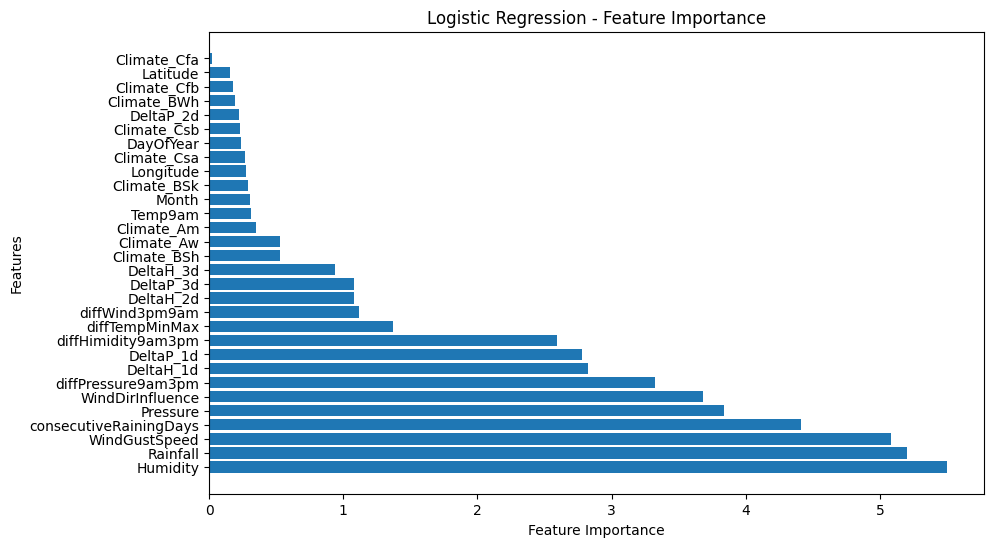

In [32]:
import matplotlib.pyplot as plt


# Get feature importance
importance = abs(lr_und.coef_[0])
feature_names = np.array([
    'Rainfall', 'WindGustSpeed', 'Temp9am', 'DayOfYear', 'Month', 'Latitude', 'Longitude',
    'diffWind3pm9am', 'diffTempMinMax', 'diffPressure9am3pm', 'Pressure', 'DeltaP_1d',
    'DeltaP_2d', 'DeltaP_3d', 'diffHimidity9am3pm', 'Humidity', 'DeltaH_1d', 'DeltaH_2d',
    'DeltaH_3d', 'WindDirInfluence', 'consecutiveRainingDays', 'Climate_Am', 'Climate_Aw',
    'Climate_BSh', 'Climate_BSk', 'Climate_BWh', 'Climate_Cfa', 'Climate_Cfb', 'Climate_Csa',
    'Climate_Csb'
])  # Replace with the actual feature names

# Sort feature importance in descending order
indices = np.argsort(importance)[::-1]
sorted_feature_names = feature_names[indices]
sorted_importance = importance[indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importance)), sorted_importance, align='center')
plt.yticks(range(len(sorted_importance)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Logistic Regression - Feature Importance')
plt.show()

In [12]:
#Test avec KNN

from sklearn.neighbors import KNeighborsClassifier

# Creation Classifieur
knn_und = KNeighborsClassifier(n_neighbors=9 )

# Fit the classifier to the training data
knn_und.fit(X_train_und, y_train_und)

# Predict the classes of the testing data
y_pred_undKNN = knn_und.predict(X_test)

# Calculate the accuracy of the classifier on the testing data
accuracy = accuracy_score(y_test, y_pred_undKNN)

# Accurary
accuracy = accuracy_score(y_test, y_pred_undKNN)
print("Accuracy:", accuracy)

# F1_score
f1 = f1_score(y_test, y_pred_undKNN)
print("F1-score:", f1)

# Matrice de confusion
cm = pd.crosstab (y_test, y_pred_undKNN, rownames = ['Class Reele'], colnames = ['Classe Prédite'])
print(cm)

Accuracy: 0.8124921294547286
F1-score: 0.6477962627138689
Classe Prédite    0.0   1.0
Class Reele                
0.0             15248  3342
1.0              1125  4108


In [ ]:
#Check with other parameters for KNN

from sklearn.model_selection import GridSearchCV

# Define a range of values for the n_neighbors hyperparameter
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Create a KNN classifier
knn2 = KNeighborsClassifier()

# Perform a grid search cross-validation over the specified parameter grid
grid_search = GridSearchCV(knn2, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train_und, y_train_und)

# Print the best value of n_neighbors and the corresponding mean cross-validation score
print("Best n_neighbors:", grid_search.best_params_['n_neighbors'])
print("Mean cross-validation score:", grid_search.best_score_)

Best n_neighbors: 9
Mean cross-validation score: 0.7948858111943065


In [ ]:
# Define the parameter grid to search over
param_grid = {'max_depth': [3, 5, 7, 9, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Create a decision tree classifier
dtc2 = DecisionTreeClassifier()

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(dtc2, param_grid=param_grid, cv=5)
grid_search.fit(X_train_und, y_train_und)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Score:", grid_search.best_score_)

Best parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Score: 0.7851361971744394


In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
dtc_undT = DecisionTreeClassifier(max_depth= 7, min_samples_leaf =  1, min_samples_split= 2)

# Fit the classifier to the training data
dtc_undT.fit(X_train_und, y_train_und)

# Predict the classes of the testing data
y_pred_undT = dtc_undT.predict(X_test)

# Accurary
accuracy = accuracy_score(y_test, y_pred_undT)
print("Accuracy:", accuracy)

# F1_score
f1 = f1_score(y_test, y_pred_undT)
print("F1-score:", f1)

# Matrice de confusion
cm = pd.crosstab (y_test, y_pred_undT, rownames = ['Class Reele'], colnames = ['Classe Prédite'])
print(cm)


Accuracy: 0.7734122486672543
F1-score: 0.6051207022677396
Classe Prédite    0.0   1.0
Class Reele                
0.0             14289  4301
1.0              1097  4136


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc_und = RandomForestClassifier(n_estimators=100)

# Fit the classifier to the training data
rfc_und.fit(X_train_und, y_train_und)

# Predict the classes of the testing data
y_pred_undR = rfc_und.predict(X_test)

# Accurary
accuracy = accuracy_score(y_test, y_pred_undR)
print("Accuracy:", accuracy)

# F1_score
f1 = f1_score(y_test, y_pred_undR)
print("F1-score:", f1)

# Matrice de confusion
cm = pd.crosstab (y_test, y_pred_undR, rownames = ['Class Reele'], colnames = ['Classe Prédite'])
print(cm)



Accuracy: 0.8155983713218319
F1-score: 0.659007995032213
Classe Prédite    0.0   1.0
Class Reele                
0.0             15185  3405
1.0               988  4245


## Undersampling - 70/40

In [18]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy=0.57, random_state=42)
X_train_und, y_train_und = undersampler.fit_resample(X_train, y_train)

In [37]:
# Création objet et entrainer sur le jeu
lr_und2 = LogisticRegression(max_iter=1000)
lr_und2.fit(X_train_und, y_train_und)

# Prediction
y_pred_und2 = lr_und2.predict(X_test)

# Accurary
accuracy = accuracy_score(y_test, y_pred_und2)
print("Accuracy:", accuracy)

# F1_score
f1 = f1_score(y_test, y_pred_und2)
print("F1-score:", f1)

# Matrice de confusion
cm = pd.crosstab (y_test, y_pred_und2, rownames = ['Class Reele'], colnames = ['Classe Prédite'])
print(cm)

Accuracy: 0.8420434034336566
F1-score: 0.6530198248040572
Classe Prédite    0.0   1.0
Class Reele                
0.0             16519  2071
1.0              1692  3541


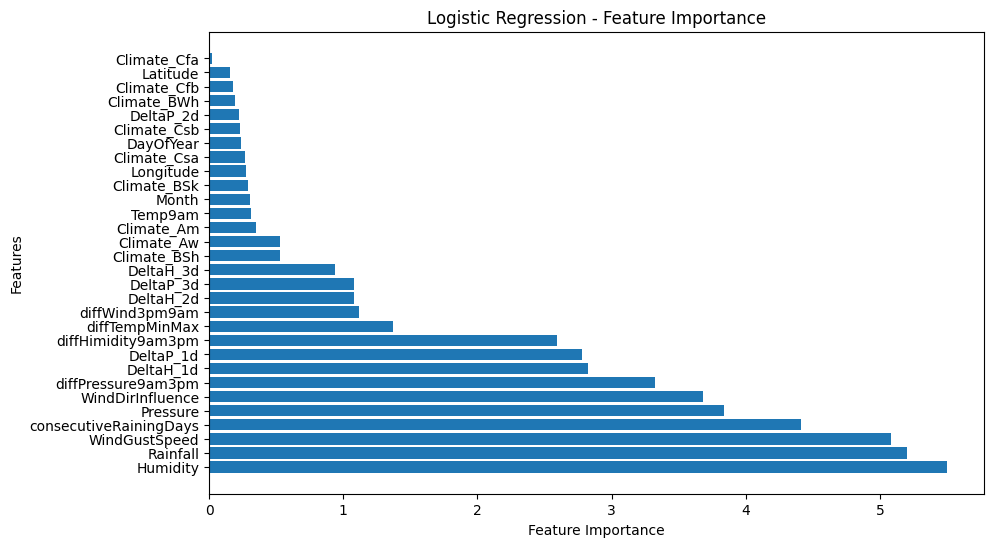

In [39]:
# Get feature importance
importance = abs(lr_und2.coef_[0])
feature_names = np.array([
    'Rainfall', 'WindGustSpeed', 'Temp9am', 'DayOfYear', 'Month', 'Latitude', 'Longitude',
    'diffWind3pm9am', 'diffTempMinMax', 'diffPressure9am3pm', 'Pressure', 'DeltaP_1d',
    'DeltaP_2d', 'DeltaP_3d', 'diffHimidity9am3pm', 'Humidity', 'DeltaH_1d', 'DeltaH_2d',
    'DeltaH_3d', 'WindDirInfluence', 'consecutiveRainingDays', 'Climate_Am', 'Climate_Aw',
    'Climate_BSh', 'Climate_BSk', 'Climate_BWh', 'Climate_Cfa', 'Climate_Cfb', 'Climate_Csa',
    'Climate_Csb'
])  # Replace with the actual feature names

# Sort feature importance in descending order
indices = np.argsort(importance)[::-1]
sorted_feature_names = feature_names[indices]
sorted_importance = importance[indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importance)), sorted_importance, align='center')
plt.yticks(range(len(sorted_importance)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Logistic Regression - Feature Importance')
plt.show()

In [ ]:
#Test avec KNN

from sklearn.neighbors import KNeighborsClassifier

# Creation Classifieur
knn_und = KNeighborsClassifier(n_neighbors=9 )

# Fit the classifier to the training data
knn_und.fit(X_train_und, y_train_und)

# Predict the classes of the testing data
y_pred_undKNN = knn_und.predict(X_test)

# Calculate the accuracy of the classifier on the testing data
accuracy = accuracy_score(y_test, y_pred_undKNN)

# Accurary
accuracy = accuracy_score(y_test, y_pred_undKNN)
print("Accuracy:", accuracy)

# F1_score
f1 = f1_score(y_test, y_pred_undKNN)
print("F1-score:", f1)

# Matrice de confusion
cm = pd.crosstab (y_test, y_pred_undKNN, rownames = ['Class Reele'], colnames = ['Classe Prédite'])
print(cm)

Accuracy: 0.8488015783066785
F1-score: 0.6611476952022577
Classe Prédite    0.0   1.0
Class Reele                
0.0             16707  1883
1.0              1719  3514


In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
dtc_undT = DecisionTreeClassifier(max_depth= 7, min_samples_leaf =  1, min_samples_split= 2)

# Fit the classifier to the training data
dtc_undT.fit(X_train_und, y_train_und)

# Predict the classes of the testing data
y_pred_undT = dtc_undT.predict(X_test)

# Accurary
accuracy = accuracy_score(y_test, y_pred_undT)
print("Accuracy:", accuracy)

# F1_score
f1 = f1_score(y_test, y_pred_undT)
print("F1-score:", f1)

# Matrice de confusion
cm = pd.crosstab (y_test, y_pred_undT, rownames = ['Class Reele'], colnames = ['Classe Prédite'])
print(cm)

Accuracy: 0.8351173235948454
F1-score: 0.6293640309492358
Classe Prédite    0.0   1.0
Class Reele                
0.0             16560  2030
1.0              1898  3335


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc_und = RandomForestClassifier(n_estimators=100)

# Fit the classifier to the training data
rfc_und.fit(X_train_und, y_train_und)

# Predict the classes of the testing data
y_pred_undR = rfc_und.predict(X_test)

# Accurary
accuracy = accuracy_score(y_test, y_pred_undR)
print("Accuracy:", accuracy)

# F1_score
f1 = f1_score(y_test, y_pred_undR)
print("F1-score:", f1)

# Matrice de confusion
cm = pd.crosstab (y_test, y_pred_undR, rownames = ['Class Reele'], colnames = ['Classe Prédite'])
print(cm)

Accuracy: 0.8559795155941737
F1-score: 0.6813411349493824
Classe Prédite    0.0   1.0
Class Reele                
0.0             16724  1866
1.0              1565  3668


## Oversampling

In [21]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_train_ov, y_train_ov = oversampler.fit_resample(X_train, y_train)

In [22]:
#Test avec Logistic Regression

# Création objet et entrainer sur le jeu
lr_ov = LogisticRegression(max_iter=1000)
lr_ov.fit(X_train_ov, y_train_ov)

# Prediction
y_pred_ov = lr_ov.predict(X_test)

# Accurary
accuracy = accuracy_score(y_test, y_pred_ov)
print("Accuracy:", accuracy)

# F1_score
f1 = f1_score(y_test, y_pred_ov)
print("F1-score:", f1)

# Matrice de confusion
cm = pd.crosstab (y_test, y_pred_ov, rownames = ['Class Reele'], colnames = ['Classe Prédite'])
print(cm)

Accuracy: 0.8077488141711792
F1-score: 0.6414030692139054
Classe Prédite    0.0   1.0
Class Reele                
0.0             15147  3443
1.0              1137  4096


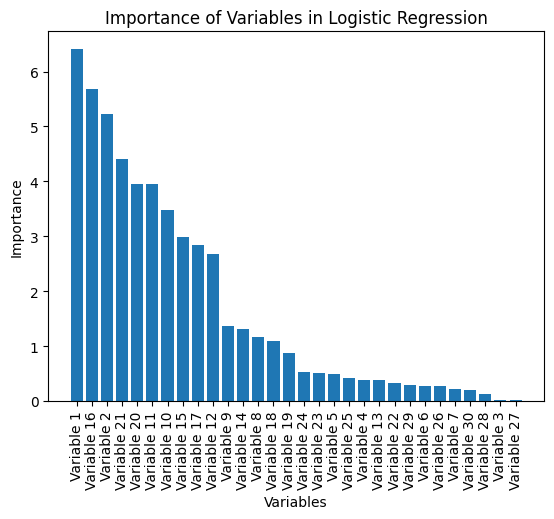

In [23]:
import matplotlib.pyplot as plt

# Generate variable names
num_variables = data.shape[1]  # Assuming data is your input array
variable_names = [f"Variable {i+1}" for i in range(num_variables)]

# Retrieve the coefficients of regression
coefficients = lr_ov.coef_[0]

# Sort variables by decreasing importance
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_variable_names = [variable_names[i] for i in sorted_indices]
sorted_coefficients = np.abs(coefficients[sorted_indices])

# Create the bar plot
plt.bar(sorted_variable_names, sorted_coefficients)

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.title('Importance of Variables in Logistic Regression')

# Rotate variable labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [ ]:
#Test avec KNN

from sklearn.neighbors import KNeighborsClassifier

# Creation Classifieur
knn_ov = KNeighborsClassifier(n_neighbors=9 )

# Fit the classifier to the training data
knn_ov.fit(X_train_ov, y_train_ov)

# Predict the classes of the testing data
y_pred_ovKNN = knn_ov.predict(X_test)

# Calculate the accuracy of the classifier on the testing data
accuracy = accuracy_score(y_test, y_pred_ovKNN)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_ovKNN)
print("Accuracy:", accuracy)

# F1_score
f1 = f1_score(y_test, y_pred_ovKNN)
print("F1-score:", f1)

# Matrice de confusion
cm = pd.crosstab (y_test, y_pred_ovKNN, rownames = ['Class Reele'], colnames = ['Classe Prédite'])
print(cm)

Accuracy: 0.8006968056080258
F1-score: 0.6331324370267346
Classe Prédite    0.0   1.0
Class Reele                
0.0             14978  3612
1.0              1136  4097


In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
dtc_ovT = DecisionTreeClassifier(max_depth= 7, min_samples_leaf =  1, min_samples_split= 2)

# Fit the classifier to the training data
dtc_ovT.fit(X_train_ov, y_train_ov)

# Predict the classes of the testing data
y_pred_ovT = dtc_ovT.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_ovT)
print("Accuracy:", accuracy)

# F1_score
f1 = f1_score(y_test, y_pred_ovT)
print("F1-score:", f1)

# Matrice de confusion
cm = pd.crosstab (y_test, y_pred_ovT, rownames = ['Class Reele'], colnames = ['Classe Prédite'])
print(cm)

Accuracy: 0.7834082035349931
F1-score: 0.6144533293475823
Classe Prédite    0.0   1.0
Class Reele                
0.0             14549  3971
1.0              1188  4111


In [ ]:
# Create a random forest classifier
rfc_ov = RandomForestClassifier(n_estimators=100)

# Fit the classifier to the training data
rfc_ov.fit(X_train_ov, y_train_ov)

# Predict the classes of the testing data
y_pred_ovR = rfc_ov.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_ovR)
print("Accuracy:", accuracy)

# F1_score
f1 = f1_score(y_test, y_pred_ovR)
print("F1-score:", f1)

# Matrice de confusion
cm = pd.crosstab (y_test, y_pred_ovR, rownames = ['Class Reele'], colnames = ['Classe Prédite'])
print(cm)

Accuracy: 0.8664511524413283
F1-score: 0.6734421517298017
Classe Prédite    0.0   1.0
Class Reele                
0.0             17358  1162
1.0              2019  3280


## Oversampling - 60/40

In [24]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy=0.4, random_state=42)
X_train_ov, y_train_ov = oversampler.fit_resample(X_train, y_train)

In [25]:
#Test avec Logistic Regression

# Création objet et entrainer sur le jeu
lr_ov = LogisticRegression(max_iter=1000)
lr_ov.fit(X_train_ov, y_train_ov)

# Prediction
y_pred_ov = lr_ov.predict(X_test)

# Accurary
accuracy = accuracy_score(y_test, y_pred_ov)
print("Accuracy:", accuracy)

# F1_score
f1 = f1_score(y_test, y_pred_ov)
print("F1-score:", f1)

# Matrice de confusion
cm = pd.crosstab (y_test, y_pred_ov, rownames = ['Class Reele'], colnames = ['Classe Prédite'])
print(cm)

Accuracy: 0.8514460815178609
F1-score: 0.6402358442614619
Classe Prédite    0.0   1.0
Class Reele                
0.0             17135  1455
1.0              2084  3149


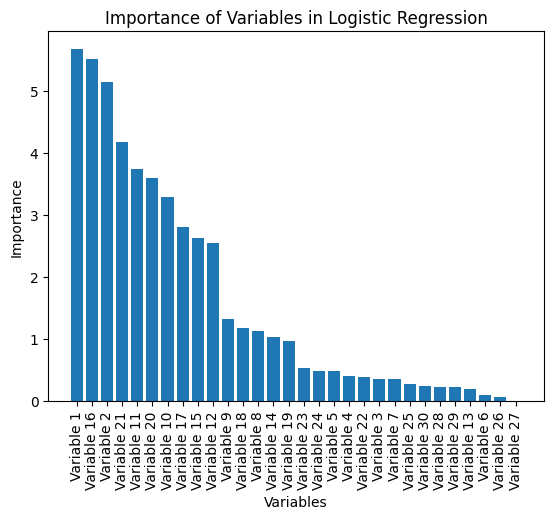

In [26]:
import matplotlib.pyplot as plt

# Generate variable names
num_variables = data.shape[1]  # Assuming data is your input array
variable_names = [f"Variable {i+1}" for i in range(num_variables)]

# Retrieve the coefficients of regression
coefficients = lr_ov.coef_[0]

# Sort variables by decreasing importance
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_variable_names = [variable_names[i] for i in sorted_indices]
sorted_coefficients = np.abs(coefficients[sorted_indices])

# Create the bar plot
plt.bar(sorted_variable_names, sorted_coefficients)

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.title('Importance of Variables in Logistic Regression')

# Rotate variable labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [ ]:
#Test avec KNN

from sklearn.neighbors import KNeighborsClassifier

# Creation Classifieur
knn_ov = KNeighborsClassifier(n_neighbors=9 )

# Fit the classifier to the training data
knn_ov.fit(X_train_ov, y_train_ov)

# Predict the classes of the testing data
y_pred_ovKNN = knn_ov.predict(X_test)

# Calculate the accuracy of the classifier on the testing data
accuracy = accuracy_score(y_test, y_pred_ovKNN)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_ovKNN)
print("Accuracy:", accuracy)

# F1_score
f1 = f1_score(y_test, y_pred_ovKNN)
print("F1-score:", f1)

# Matrice de confusion
cm = pd.crosstab (y_test, y_pred_ovKNN, rownames = ['Class Reele'], colnames = ['Classe Prédite'])
print(cm)

Accuracy: 0.8512951845165624
F1-score: 0.6428715466827989
Classe Prédite    0.0   1.0
Class Reele                
0.0             17089  1431
1.0              2111  3188


In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
dtc_ovT = DecisionTreeClassifier(max_depth= 7, min_samples_leaf =  1, min_samples_split= 2)

# Fit the classifier to the training data
dtc_ovT.fit(X_train_ov, y_train_ov)

# Predict the classes of the testing data
y_pred_ovT = dtc_ovT.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_ovT)
print("Accuracy:", accuracy)

# F1_score
f1 = f1_score(y_test, y_pred_ovT)
print("F1-score:", f1)

# Matrice de confusion
cm = pd.crosstab (y_test, y_pred_ovT, rownames = ['Class Reele'], colnames = ['Classe Prédite'])
print(cm)

Accuracy: 0.8459633066039716
F1-score: 0.620461363401262
Classe Prédite    0.0   1.0
Class Reele                
0.0             17151  1369
1.0              2300  2999


In [ ]:
# Create a random forest classifier
rfc_ov = RandomForestClassifier(n_estimators=100)

# Fit the classifier to the training data
rfc_ov.fit(X_train_ov, y_train_ov)

# Predict the classes of the testing data
y_pred_ovR = rfc_ov.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_ovR)
print("Accuracy:", accuracy)

# F1_score
f1 = f1_score(y_test, y_pred_ovR)
print("F1-score:", f1)

# Matrice de confusion
cm = pd.crosstab (y_test, y_pred_ovR, rownames = ['Class Reele'], colnames = ['Classe Prédite'])
print(cm)

Accuracy: 0.8656534699189723
F1-score: 0.6517196343056161
Classe Prédite    0.0   1.0
Class Reele                
0.0             17625   895
1.0              2305  2994


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create a random forest classifier
rfc_ov = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5]
}

# Create the grid search object
grid_search = GridSearchCV(rfc_ov, param_grid, scoring='accuracy', cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train_ov, y_train_ov)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict the classes of the testing data using the best estimator
y_pred_ovR = best_estimator.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_ovR)
print("Accuracy:", accuracy)

# F1-score
f1 = f1_score(y_test, y_pred_ovR)
print("F1-score:", f1)

# Matrice de confusion
cm = pd.crosstab(y_test, y_pred_ovR, rownames=['Class Réelle'], colnames=['Classe Prédite'])
print(cm)

# Print the best parameters
print("Best parameters:", best_params)

KeyboardInterrupt: ignored

# Conclusion

Pour l'instant on a les meilleurs résultats avec Random Forest Classifier, sans même vérifier les meilleurs paramètres. Qui prennent beaucoup trop de temps donc il va falloir surement réduir le jeux d'avantage, car même en undersampling il ne trouve pas.

Dans un deuxième temps on peut également ajuster les variables en fonction du modèle.